In [1]:
import pandas as pd
import openpyxl

# Cleaning and exporting new file

In [2]:

# Load the Excel file
excel_file_path = 'Fledglings Flight Content v1.2.xlsx'
xl = pd.ExcelFile(excel_file_path)

# Define the list of sheet names and their corresponding transformations for cleaning
sheet_transformations = [
    ('Config', {
        'skip_sheet': True  # Skip processing for 'Config' sheet
    }),
    ('Milestones', {
        'delete_first_column': True,  # Delete the first column
        'start_row': 4,  # Start reading data from row 4
        'num_columns': 8
    }),
    ('Exercises', {
        'delete_first_column': True,  # Delete the first column
        'start_row': 4,  # Start reading data from row 4
        'num_columns': 14,
    }),
    ('Task', {
        'delete_first_column': True,  # Delete the first column
        'start_row': 4,  # Start reading data from row 4
        'num_columns': 2,
        'rename_columns': {'C': 'Task'}
    }),
    ('new_tasks', {
        'delete_first_column': True,  # Delete the first column
        'start_row': 4,  # Start reading data from row 4
        'num_columns': 2,
        'rename_columns': {'B': 'exerciseID', 'C': 'Task'}
    }),
    ('Toys', {
        'delete_first_column': True,  # Delete the first column
        'start_row': 4,  # Start reading data from row 4
        'num_columns': 14
    }),
    ('ToyActivityInstructions', {
        'start_row': 2,  # Start reading data from row 2
    }),
    ('Resources', {
        'delete_first_column': True,  # Delete the first column
        'start_row': 4,  # Start reading data from row 4
        'num_columns': 8,
        'rename_columns': {'Unnamed: 7': 'FutureImage'}
    })
]

# Function to apply transformations to a sheet
def transform_sheet(sheet_name, transformations):
    df = xl.parse(sheet_name, header=None)  # Read without header initially
    
    # Skip sheet if specified
    if 'skip_sheet' in transformations and transformations['skip_sheet']:
        return None
    
    # Delete the first column if specified
    if 'delete_first_column' in transformations and transformations['delete_first_column']:
        df = df.iloc[:, 1:]
    
    # Start reading data from the specified row
    if 'start_row' in transformations:
        df = df.iloc[transformations['start_row'] - 1:]
    
    # Ensure the correct number of columns if specified
    if 'num_columns' in transformations:
        df = df.iloc[:, :transformations['num_columns']]
    
    # Set the header to be the row below the current header and delete the original header row
    df.columns = df.iloc[0]
    df = df[1:]
    
    # Rename columns if specified
    if 'rename_columns' in transformations:
        for old_name, new_name in transformations['rename_columns'].items():
            df.rename(columns={old_name: new_name}, inplace=True)
    
    return df

# Create a dictionary to store the cleaned data for each sheet
cleaned_data = {}

# Process each sheet and store the cleaned data
for sheet_name, transformations in sheet_transformations:
    df = transform_sheet(sheet_name, transformations)
    if df is not None:
        cleaned_data[sheet_name] = df

# Save the cleaned data to a new Excel file
with pd.ExcelWriter('Cleaned.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, df in cleaned_data.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned data has been saved as 'Cleaned_Fledglings_Flight_Content.xlsx'.")


Cleaned data has been saved as 'Cleaned_Fledglings_Flight_Content.xlsx'.


# Reading data

In [3]:
import pandas as pd

# Provide the full path to the Excel file
excel_file_path = 'Cleaned.xlsx'

# Specify the sheet names you want to read
sheets_to_read = ['Milestones', 'Exercises', 'Task', 'new_tasks', 'Toys', 'ToyActivityInstructions', 'Resources']

# Create a dictionary to store the DataFrames for each sheet
sheet_data = {}

# Read each specified sheet into a DataFrame and store it in the dictionary
for sheet_name in sheets_to_read:
    if sheet_name == 'Exercises':
        df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=None)
        df.columns = df.iloc[0]
        df = df.iloc[1:]
    else:
        df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    sheet_data[sheet_name] = df

# Now you have a dictionary containing DataFrames for each specified sheet
# You can access them like this:
milestones_df = sheet_data['Milestones']
exercises_df = sheet_data['Exercises']
task_df = sheet_data['Task']
new_tasks_df = sheet_data['new_tasks']
toys_df = sheet_data['Toys']
toy_activity_instructions_df = sheet_data['ToyActivityInstructions']
resources_df = sheet_data['Resources']

# You can work with these DataFrames as needed
print(milestones_df)
print(exercises_df)
print(task_df)
print(new_tasks_df)
print(toys_df)
print(toy_activity_instructions_df)
print(resources_df)
# ... and so on for other DataFrames


      ID                                         Title  \
0      1                                Rooting reflex   
1      2                             Tonic neck reflex   
2      3               Step reflex - Automatic walking   
3      4               Curls toes when foot is stroked   
4      5  Opens & closes hands with outstretched arms    
..   ...                                           ...   
807  808         Can have 2 to 3 sentence conversation   
808  809                    Understands long sentences   
809  810                 Says 5 or more word sentences   
810  811               Has 1500 - 2500 word vocabulary   
811  812                            Uses more pronouns   

                                             ImageName  \
0    https://www.fledglingsflight.com/assets/catego...   
1    https://www.fledglingsflight.com/assets/catego...   
2    https://www.fledglingsflight.com/assets/catego...   
3    https://www.fledglingsflight.com/assets/catego...   
4    https://

# filling in empty vaues for merged rows

In [4]:
# Define a list of columns to fill in for the 'Exercises' DataFrame
columns_to_keep = ['ID', 'Title','DevelopmentCategory', 'AgeGroup']

# Fill empty values in specified columns
exercises_df = exercises_df[columns_to_keep]

# Drop rows where 'ID' is null
exercises_df = exercises_df.dropna(subset=['ID'])

# Reset the index
exercises_df.reset_index(drop=True, inplace=True)


# Collect the remaining NaN (missing) values
missing_values = exercises_df[columns_to_keep].isna().sum()



# Print the missing values for the specified columns
print("Missing values in 'Exercises' DataFrame:")
print(missing_values)


Missing values in 'Exercises' DataFrame:
0
ID                     0
Title                  1
DevelopmentCategory    1
AgeGroup               1
dtype: int64


In [5]:
# renaming columns 

milestones_df.rename(columns={'Title': 'Milestones Title'}, inplace=True)

exercises_df.rename(columns={'Title': 'Exercises Title', 'Goal': 'Exercises Goal'}, inplace=True)


toys_df.rename(columns={'Title': 'Toys Title'}, inplace=True)

## Visualization


C:\Users\shrey\AppData\Local\Temp\ipykernel_17744\3048116352.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_counts_df = null_counts_df.append({'Column': column, 'Null Count': null_count}, ignore_index=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_17744\3048116352.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_counts_df = null_counts_df.append({'Column': column, 'Null Count': null_count}, ignore_index=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_17744\3048116352.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_counts_df = null_counts_df.append({'Column': column, 'Null Count': null_count}, ignore_index=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_17744\3048116352.py:33: FutureWarni

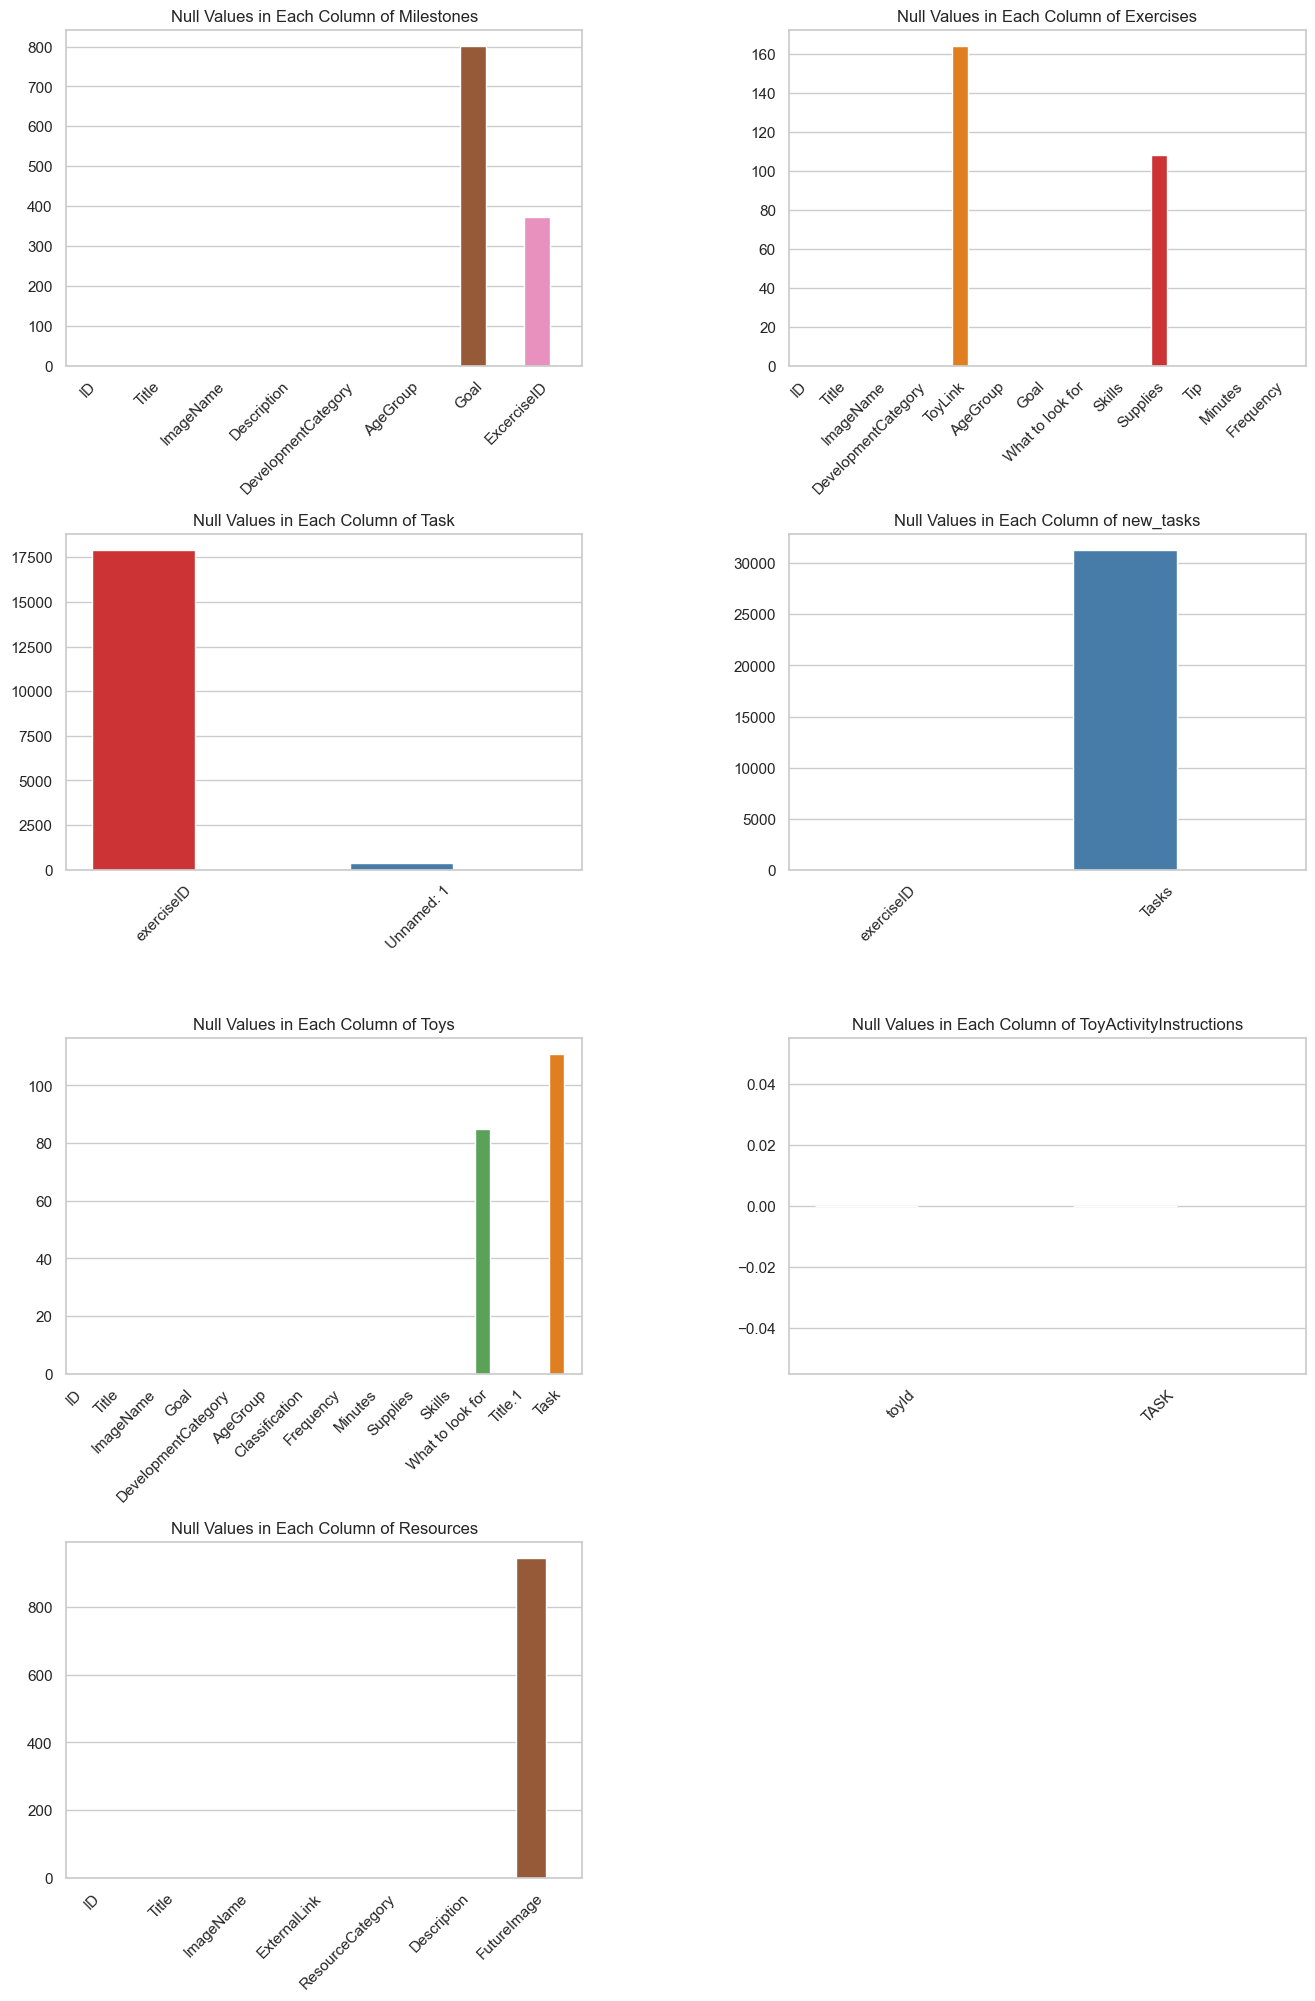

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math  # Import math module for calculations

# Assuming you have DataFrames for each sheet named: milestones_df, exercises_df, task_df, new_tasks_df, toys_df, toy_activity_instructions_df, resources_df

# List of DataFrames
dataframes = [milestones_df, exercises_df, task_df, new_tasks_df, toys_df, toy_activity_instructions_df, resources_df]

# List of sheet names
sheet_names = ['Milestones', 'Exercises', 'Task', 'new_tasks', 'Toys', 'ToyActivityInstructions', 'Resources']

# Calculate the number of rows and columns for subplots dynamically
num_plots = len(dataframes)
num_cols = 2  # Number of columns per row
num_rows = math.ceil(num_plots / num_cols)

# Adjusted figsize for larger margins
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6 * num_rows))

# Decreased bar width
bar_width = 0.4  # Adjust the width as needed

# Create bar plots for null values in each column for each sheet
for i, (sheet_df, sheet_name) in enumerate(zip(dataframes, sheet_names)):
    # Create an empty DataFrame to store null value counts
    null_counts_df = pd.DataFrame(columns=['Column', 'Null Count'])

    # Calculate null value counts for each column
    for column in sheet_df.columns:
        null_count = sheet_df[column].isnull().sum()
        null_counts_df = null_counts_df.append({'Column': column, 'Null Count': null_count}, ignore_index=True)

    # Set up the seaborn style and palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("Set1", len(null_counts_df))

    # Determine the row and column for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Create a bar plot using seaborn on the current subplot
    sns.barplot(data=null_counts_df, x='Column', y='Null Count', ax=axes[row, col], palette=palette, saturation=0.75)
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')
    axes[row, col].set_title(f"Null Values in Each Column of {sheet_name}")

    # Adjust the width of bars
    for bar in axes[row, col].patches:
        bar.set_width(bar_width)

    # Remove extra labels and axes
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Remove any empty subplots if there are extra
for i in range(len(dataframes), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots and add more margin
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Show the combined plot
plt.show()


In [6]:
# Merge dataframes based on AgeGroup and DevelopmentCategory
merged_df = exercises_df[['AgeGroup', 'DevelopmentCategory', 'Exercises Title']].merge(
    milestones_df[['AgeGroup', 'DevelopmentCategory', 'Milestones Title']],
    on=['AgeGroup', 'DevelopmentCategory'],
    how='outer'
)

merged_df = merged_df.merge(toys_df[['AgeGroup', 'DevelopmentCategory', 'Toys Title']],
                            on=['AgeGroup', 'DevelopmentCategory'], how='outer')

C:\Users\shrey\AppData\Local\Temp\ipykernel_19064\1052559124.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merged_df = exercises_df[['AgeGroup', 'DevelopmentCategory', 'Exercises Title']].merge(


In [7]:
# Replace NaN values with a default value (e.g., 0) and convert the column to integers
merged_df['DevelopmentCategory'] = merged_df['DevelopmentCategory'].fillna(0).astype(int)
merged_df['AgeGroup'] = merged_df['AgeGroup'].fillna(0).astype(int)


# Exporting CSV for modeling

In [ ]:
# Save the DataFrame to a CSV file
merged_df.to_csv('Data Model.csv', index=False)